In [3]:
import glob
import pickle
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind_from_stats, ttest_ind

from pylab import *

from collections import OrderedDict
from operator import getitem

import matplotlib.pyplot as plt
import seaborn as sns

from atlas import __datasets__

In [12]:
# plotting stuff

HUE_ORDER = [
        'RandomSearch', 
        #'Gpyopt', 
        'Botorch',
        'RGPE',
        #'DKT',
]

LABELS = [
    'Random', 
    #'GPyOpt',
    'BoTorch',
    'RGPE',
    #'DKT',
]

PALETTE = [
        'gray', 
     #   '#084c61', 
        '#db504a',
        '#ffaf87',
      #  '#656839',
]

SINGLE_TASK_PLANNERS = [
    'RandomSearch', 
    #'Gpyopt'
    'Botorch',
]


In [13]:
# completed_dirs = [
#     'dataset_a/runs',
#     'dataset_b/runs',
#     'dataset_c/runs',
#     'dataset_d/runs',
#     'dataset_e/runs',
# ]

completed_dirs = [
    'dataset_a_5/runs',
    'dataset_b_5/runs',
    'dataset_c_5/runs',
    'dataset_d_5/runs',
    'dataset_e_5/runs',
]

In [15]:
all_dfs = []
map_ = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
    
for dir_ in completed_dirs:

    files = glob.glob(f'{dir_}/*.pkl')
    for file in files:
        split = file.split('/')[-1].split('.')[0].split('_')
        
        run_ix = int(split[-1])
        core_ix = map_[split[-2]]

        method = split[-4]

        # load in the tasks
        tasks = pickle.load(
            open(f'{__datasets__}/dataset_buchwald/buchwald_tasks.pkl', 'rb')
        )

        target_task = tasks[core_ix]

        # get the ranks
        values = target_task['values']
        sort_values = np.sort(values, axis=0)[::-1]  # for yield, larger is better
        ranks = {v[0]: i+1 for i, v in enumerate(sort_values)}

        res = pickle.load(open(file, 'rb'))
        params, values = res['params'], res['values']
        assert len(params)==len(values)
        if not len(values.shape)==1:
            values = values.flatten()
        num_eval = len(values)

        param_dim = params.shape[1]

        seed_dict = {f'param_{i}': [] for i in range(param_dim)}
        seed_dict['value'] = []
        seed_dict['rank'] = []
        seed_dict['iter'] = []

        for iter, (p, v) in enumerate(zip(params, values)):
            #v = v[0]
            for ix, element in enumerate(p):
                seed_dict[f'param_{ix}'].append(element)
            seed_dict['value'].append(v)
            seed_dict['rank'].append(ranks[v])
            seed_dict['iter'].append(iter+1)

        seed_dict['method'] = method
        if method in SINGLE_TASK_PLANNERS:
            seed_dict['type'] = 'Single task'
        else:
            seed_dict['type'] = 'Meta-learning'
        seed_dict['seed'] = run_ix
        #seed_dict['desc_type'] = desc_type
        seed_dict['core_ix'] = core_ix

        seed_df = pd.DataFrame(seed_dict)
        seed_df['cummax_val'] = seed_df['value'].cummax()
        seed_df['cummin_rank'] = seed_df['rank'].cummin()
        seed_df['num_eval'] = num_eval
        
        all_dfs.append(seed_df)

df = pd.concat(all_dfs)

In [16]:
df.shape

(91930, 14)

In [ ]:
def get_stats():
    
    return None

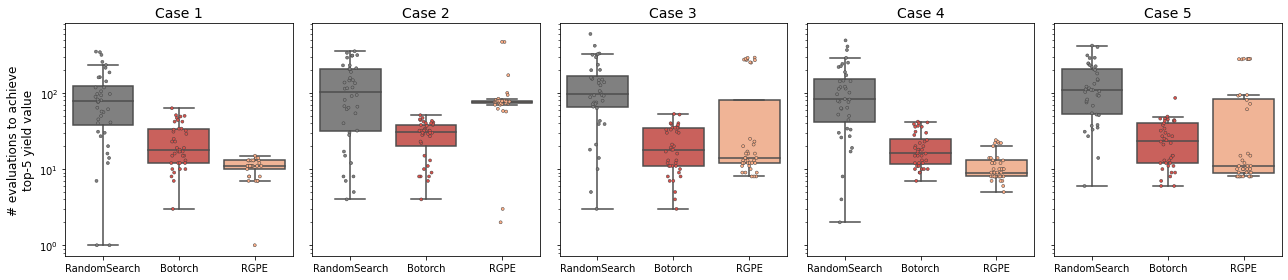

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(18, 4), sharex=False, sharey=True)
axes = axes.flatten()

#----------------
# CASE 1
#----------------
sub_df = df[df['core_ix']==0]
sub_df = sub_df[sub_df['iter']==1]

# stats_0 = get_stats(sub_df)

_ = sns.boxplot(ax=axes[0], data=sub_df, x="method", y="num_eval", showfliers=False, 
                order=HUE_ORDER, palette=PALETTE)

g_ = sns.stripplot(ax=axes[0], data=sub_df, x="method", y="num_eval", 
                  order=HUE_ORDER, palette=PALETTE, 
                  edgecolor='#444444', linewidth=0.5, size=3)

axes[0].set_title('Case 1', fontsize=14)

g_.set(xlabel=None)


#----------------
# CASE 2
#----------------
sub_df = df[df['core_ix']==1]
sub_df = sub_df[sub_df['iter']==1]

# stats_4 = get_stats(sub_df)

_ = sns.boxplot(ax=axes[1], data=sub_df, x="method", y="num_eval", showfliers=False, 
                    order=HUE_ORDER, palette=PALETTE)

g_ = sns.stripplot(ax=axes[1], data=sub_df, x="method", y="num_eval", 
                      order=HUE_ORDER, palette=PALETTE, 
                      edgecolor='#444444', linewidth=0.5, size=3)

axes[1].set_title('Case 2', fontsize=14)

g_.set(xlabel=None)


#----------------
# CASE 3
#----------------
sub_df = df[df['core_ix']==2]
sub_df = sub_df[sub_df['iter']==1]

# stats_7 = get_stats(sub_df)

_ = sns.boxplot(ax=axes[2], data=sub_df, x="method", y="num_eval", showfliers=False, 
                    order=HUE_ORDER, palette=PALETTE)

g_ = sns.stripplot(ax=axes[2], data=sub_df, x="method", y="num_eval", 
                      order=HUE_ORDER, palette=PALETTE, 
                      edgecolor='#444444', linewidth=0.5, size=3)

axes[2].set_title('Case 3', fontsize=14)

g_.set(xlabel=None)



#----------------
# CASE 4
#----------------
sub_df = df[df['core_ix']==3]
sub_df = sub_df[sub_df['iter']==1]

# stats_8 = get_stats(sub_df)


g_ = sns.boxplot(ax=axes[3], data=sub_df, x="method", y="num_eval", showfliers=False, 
                    order=HUE_ORDER, palette=PALETTE)

_ = sns.stripplot(ax=axes[3], data=sub_df, x="method", y="num_eval", 
                      order=HUE_ORDER, palette=PALETTE, 
                      edgecolor='#444444', linewidth=0.5, size=3)

axes[3].set_title('Case 4', fontsize=14)


#----------------
# CASE 5
#----------------
sub_df = df[df['core_ix']==4]
sub_df = sub_df[sub_df['iter']==1]

# stats_14 = get_stats(sub_df)


_ = sns.boxplot(ax=axes[4], data=sub_df, x="method", y="num_eval", showfliers=False, 
                    order=HUE_ORDER, palette=PALETTE)

g_ = sns.stripplot(ax=axes[4], data=sub_df, x="method", y="num_eval", 
                      order=HUE_ORDER, palette=PALETTE, 
                      edgecolor='#444444', linewidth=0.5, size=3)

axes[4].set_title('Case 5', fontsize=14)

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    
#     ax.set_xticklabels(LABELS, rotation=90, fontsize=10)

axes[0].set_ylabel('# evaluations to achieve\ntop-5 yield value', fontsize=12)

axes[0].set_yscale('log')
plt.tight_layout()
plt.savefig('buchwald_meta_learning_boxplot.png', dpi=400)

138.175

In [9]:
def plot_traces_mean(sub_df, ax, labels=LABELS, hue_order=HUE_ORDER, palette=PALETTE, w_unc=True):
    ''' plot traces according to rank of parameter 
    '''
    #for method, label, color in zip(hue_order[:-1], labels[:-1], palette[:-1]):
    for method, label, color in zip(hue_order, labels, palette):
        traces = []
        m_df = sub_df[sub_df['method']==method]
        for seed in range(len(m_df['seed'].unique())):
            s_df = m_df[m_df['seed']==seed]
            s_df = s_df.sort_values(by='iter')
            cummin_ranks = s_df['cummin_rank'].values
            if cummin_ranks.shape[0] < 276:
                pad = np.ones(276-cummin_ranks.shape[0]) * np.amin(cummin_ranks)
                cummin_ranks = np.concatenate((cummin_ranks, pad))  
            elif cummin_ranks.shape[0]>276:
                cummin_ranks = cummin_ranks[:276]

            traces.append(np.array(cummin_ranks))
        traces = np.array(traces)
        mean = np.nanmean(traces, axis=0)
        
        stderr = np.nanstd(traces, axis=0, ddof=1)/ np.sqrt(np.shape(traces)[0]-1)
        
        x = np.arange(np.shape(traces)[1])+1
        
        if method  in ['RandomSearch', 'Gryffin', 'Gpyopt', 'Falcon', 'Falcon-GPBO', 'Botorch']:
            style='--'
        else:
            style='-'
        
        ax.plot(x, mean, color=color, linewidth=2, ls=style, label=label)
    
        if w_unc:
            ax.fill_between(x, y1=mean-1.96*stderr, y2=mean+1.96*stderr, alpha=0.2, color=color)
            ax.plot(x, mean-1.96*stderr, color=color, linewidth=1, alpha=0.5)
            ax.plot(x, mean+1.96*stderr, color=color, linewidth=1, alpha=0.5)

/opt/anaconda3/envs/atlas/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/opt/anaconda3/envs/atlas/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/opt/anaconda3/envs/atlas/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


IndexError: tuple index out of range

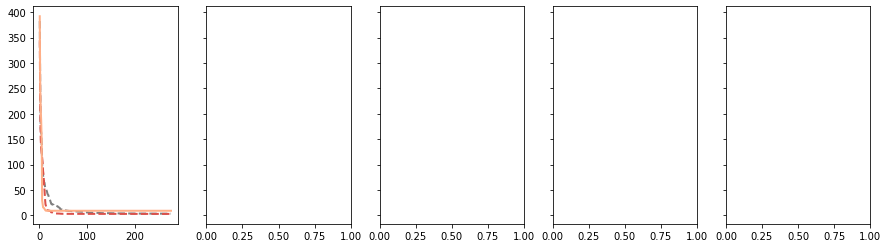

In [10]:
#---------------------------------
# RANK TRACES WITHOUT UNCERTAINTY
#---------------------------------

fig, axes = plt.subplots(1, 5, figsize=(15, 4), sharex=False, sharey=True)
axes = axes.flatten()

#----------------
# Oth ARYL HALIDE
#----------------
sub_df = df[df['core_ix']==0]

plot_traces_mean(sub_df, ax=axes[0], w_unc=False)
axes[0].set_yscale('log')


axes[0].set_title('Aryl halide 1', fontsize=12)


#----------------
# 4th ARYL HALIDE
#----------------
sub_df = df[df['core_ix']==1]

plot_traces_mean(sub_df, ax=axes[1], w_unc=False )
axes[1].set_yscale('log')


axes[1].set_title('Aryl halide 5', fontsize=12)



#----------------
# 7th ARYL HALIDE
#----------------
sub_df = df[df['core_ix']==2]

plot_traces_mean(sub_df, ax=axes[2], w_unc=False)
axes[2].set_yscale('log')


axes[2].set_title('Aryl halide 8', fontsize=12)



#----------------
# 8th ARYL HALIDE
#----------------
sub_df = df[df['core_ix']==3]

plot_traces_mean(sub_df, ax=axes[3], w_unc=False)
axes[3].set_yscale('log')


axes[3].set_title('Aryl halide 9', fontsize=12)


#----------------
# 14th ARYL HALIDE
#----------------
sub_df = df[df['core_ix']==4]

plot_traces_mean(sub_df, ax=axes[4], w_unc=False)
axes[4].set_yscale('log')

axes[4].set_title('Aryl halide 15', fontsize=12)

for ax in axes:
    ax.set_ylim(1, 200)
    ax.set_xlabel('# evaluations', fontsize=12)

axes[0].set_ylabel('Best candidate rank achieved', fontsize=12)
axes[0].legend(loc='upper right', fontsize=8, ncol=1, frameon=False)


plt.tight_layout()